In [94]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


In [37]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [114]:
#Load threshold data
M = 30
N = 10000
alg = 'threshold'
fn_in = './runs/bandit_%s_M_%d_N_%d.npz'%(alg, M, N)

a = np.load(fn_in)
regret_thr = a['regret']
arm_pulls_thr = a['arm_pulls']
update_pol_thr = a['update_pol']

alg = 'linucb'
fn_in = './runs/bandit_%s_M_%d_N_%d.npz'%(alg, M, N)
a = np.load(fn_in)
regret_ucb = a['regret']
arm_pulls_ucb = a['arm_pulls']

alg = 'greedy'
fn_in = './runs/bandit_%s_M_%d_N_%d.npz'%(alg, M, N)
a = np.load(fn_in)
regret_gre = a['regret']
arm_pulls_gre = a['arm_pulls']

alg = 'thresholdcons'
fn_in = './runs/bandit_%s_M_%d_N_%d.npz'%(alg, M, N)
a = np.load(fn_in)
regret_thrcons = a['regret']
arm_pulls_thrcons = a['arm_pulls']
update_pol_thrcons = a['update_pol']

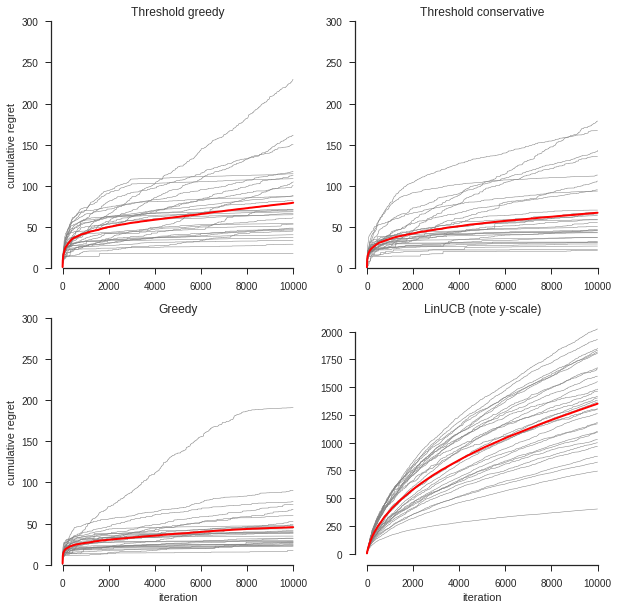

In [132]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].plot(smooth(np.cumsum(regret_thr, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,0].plot(np.mean(np.cumsum(regret_thr, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,0].set_ylabel('cumulative regret')
axes[0,0].set_ylim([0, 300])
axes[0,0].set_title('Threshold greedy')

axes[0,1].plot(smooth(np.cumsum(regret_thrcons, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,1].plot(np.mean(np.cumsum(regret_thrcons, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,1].set_title('Threshold conservative')
axes[0,1].set_ylim([0, 300])

axes[1,0].plot(smooth(np.cumsum(regret_gre, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,0].plot(np.mean(np.cumsum(regret_gre, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,0].set_xlabel('iteration')
axes[1,0].set_ylabel('cumulative regret')
axes[1,0].set_title('Greedy')
axes[1,0].set_ylim([0, 300])

axes[1,1].plot(smooth(np.cumsum(regret_ucb, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,1].plot(np.mean(np.cumsum(regret_ucb, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,1].set_xlabel('iteration')
axes[1,1].set_title('LinUCB (note y-scale)')

sns.despine(trim = True)
plt.savefig('./figs/compare_methods_traces.pdf')

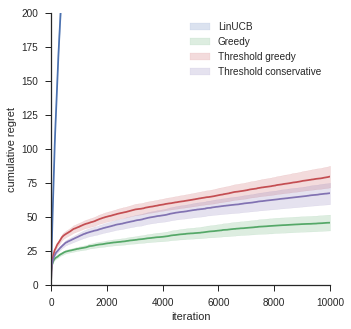

In [133]:
#Plot all on same axis
fig, axes = plt.subplots(1,1,figsize=(5,5))
sns.tsplot(smooth(np.cumsum(regret_ucb, axis = 1), box_pts = 1), color='C0')
sns.tsplot(smooth(np.cumsum(regret_gre, axis = 1), box_pts = 1), color='C1')
sns.tsplot(smooth(np.cumsum(regret_thr, axis = 1), box_pts = 1), color='C2')
sns.tsplot(smooth(np.cumsum(regret_thrcons, axis = 1), box_pts = 1), color='C3')
axes.set_ylim([0, 200])
axes.set_xlim([0, 10000])
axes.set_xlabel('iteration')
axes.set_ylabel('cumulative regret')
axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative'])
sns.despine(trim = True)
plt.savefig('./figs/compare_methods_means.pdf')

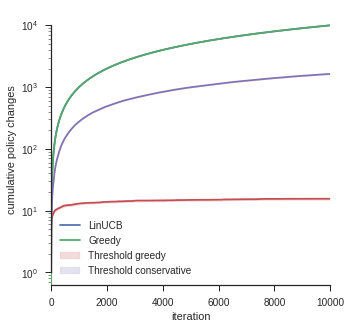

In [134]:
#Plot number of policy changes. By definition both greedy and LinUCB are linear
fig, axes = plt.subplots(1,1,figsize=(5,5))
axes.plot(np.arange(10000))
axes.plot(np.arange(10000))
sns.tsplot(np.cumsum(update_pol_thr, axis = 1), color = 'C2')
sns.tsplot(np.cumsum(update_pol_thrcons, axis = 1), color = 'C3')
#axes.set_ylim([0, 10000])
axes.set_xlim([0, 10000])
axes.set_xlabel('iteration')
axes.set_ylabel('cumulative policy changes')
axes.set_yscale('log')
axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative'])
sns.despine(trim = True)
plt.savefig('./figs/compare_methods_pol_changes_means.pdf')

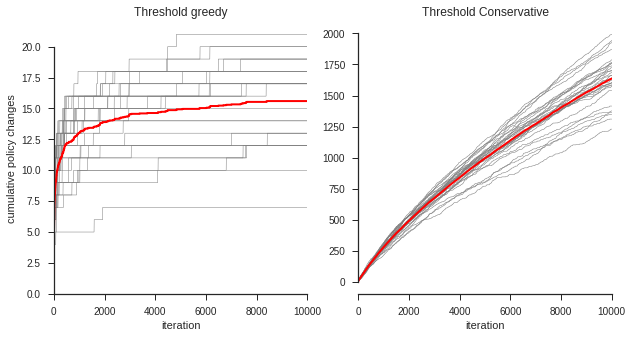

In [135]:
#Plot number of policy changes. By definition both greedy and LinUCB are linear
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(np.cumsum(update_pol_thr, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[1].plot(np.cumsum(update_pol_thrcons, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[0].plot(np.mean(np.cumsum(update_pol_thr, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[1].plot(np.mean(np.cumsum(update_pol_thrcons, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[0].set_xlim([0, 10000])
axes[1].set_xlim([0, 10000])
axes[0].set_xlabel('iteration')
axes[1].set_xlabel('iteration')
axes[0].set_ylabel('cumulative policy changes')
axes[0].set_title('Threshold greedy')
axes[1].set_title('Threshold Conservative')
sns.despine(trim = True)
plt.savefig('./figs/compare_methods_pol_changes_traces.pdf')